In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
import zipfile
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [3]:
local_zip = '/content/drive/MyDrive/Staragile/Copy of archive (1).zip'
zipref = zipfile.ZipFile(local_zip)
zipref.extractall('/content/Data')

sport_list = os.listdir('/content/Data/input/data')
sport_name = [file for file in sport_list if not (file.endswith('.txt') or file.endswith('.csv')or file.endswith('.pkl'))]
sport_name

['wwe',
 'swimming',
 'ice_hockey',
 'boxing',
 'hockey',
 'fencing',
 'football',
 'motogp',
 'table_tennis',
 'kabaddi',
 'formula1',
 'models',
 'cricket',
 'weight_lifting',
 'shooting',
 'chess',
 'volleyball',
 'baseball',
 'gymnastics',
 'basketball',
 'tennis',
 'badminton',
 'wrestling']

In [4]:
base_dir = '/content/Data/input/data'
var_name = ['data_'+name for name in sport_name]

In [5]:
for index,name in enumerate(sport_name):
  full_path = os.path.join(base_dir,name)

  print(f'{var_name[index]} : ',full_path)
  globals()[var_name[index]] = full_path

data_wwe :  /content/Data/input/data/wwe
data_swimming :  /content/Data/input/data/swimming
data_ice_hockey :  /content/Data/input/data/ice_hockey
data_boxing :  /content/Data/input/data/boxing
data_hockey :  /content/Data/input/data/hockey
data_fencing :  /content/Data/input/data/fencing
data_football :  /content/Data/input/data/football
data_motogp :  /content/Data/input/data/motogp
data_table_tennis :  /content/Data/input/data/table_tennis
data_kabaddi :  /content/Data/input/data/kabaddi
data_formula1 :  /content/Data/input/data/formula1
data_models :  /content/Data/input/data/models
data_cricket :  /content/Data/input/data/cricket
data_weight_lifting :  /content/Data/input/data/weight_lifting
data_shooting :  /content/Data/input/data/shooting
data_chess :  /content/Data/input/data/chess
data_volleyball :  /content/Data/input/data/volleyball
data_baseball :  /content/Data/input/data/baseball
data_gymnastics :  /content/Data/input/data/gymnastics
data_basketball :  /content/Data/inpu

In [6]:
for path in var_name:
  print(os.listdir(globals()[path])[:5])

['00000663.jpg', '00000555.jpg', '00000403.jpg', '00000429.jpg', '00000619.PNG']
['00000663.jpg', '00000555.jpg', '00000403.jpg', '00000162.jpg', '00000429.jpg']
['00000663.jpg', '00000555.jpg', '00000403.jpg', '00000162.jpg', '00000530.JPG']
['00000663.jpg', '00000555.jpg', '00000403.jpg', '00000162.jpg', '00000627.jpg']
['00000403.jpg', '00000162.jpg', '00000576.jpeg', '00000429.jpg', '00000222.jpg']
['00000555.jpg', '00000403.jpg', '00000162.jpg', '00000627.jpg', '00000222.jpg']
['00000248.jpeg', '00000663.jpg', '00000265.JPG', '00000162.jpg', '00000627.jpg']
['00000663.jpg', '00000555.jpg', '00000403.jpg', '00000162.jpg', '00000627.jpg']
['00000555.jpg', '00000403.jpg', '00000162.jpg', '00000340.jpeg', '00000627.jpg']
['00000403.jpg', '00000162.jpg', '00000429.jpg', '00000222.jpg', '00000009.jpg']
['00000663.jpg', '00000403.jpg', '00000162.jpg', '00000627.jpg', '00000429.jpg']
['res50-stage-3.pth', 'unfreeze-stage-1.pth', 'stage-1.pth', 'tmp.pth', 'res50-stage-2.pth']
['00000663.jp

In [7]:
for i,j in enumerate(sport_name):
  print(f'Number of images in {j} : ', len(os.listdir(globals()[var_name[i]])))

Number of images in wwe :  671
Number of images in swimming :  689
Number of images in ice_hockey :  715
Number of images in boxing :  705
Number of images in hockey :  572
Number of images in fencing :  634
Number of images in football :  799
Number of images in motogp :  679
Number of images in table_tennis :  714
Number of images in kabaddi :  455
Number of images in formula1 :  687
Number of images in models :  6
Number of images in cricket :  667
Number of images in weight_lifting :  577
Number of images in shooting :  536
Number of images in chess :  481
Number of images in volleyball :  713
Number of images in baseball :  746
Number of images in gymnastics :  719
Number of images in basketball :  492
Number of images in tennis :  718
Number of images in badminton :  928
Number of images in wrestling :  611


In [8]:

allowed_extensions = ['.png', '.jpg', '.jpeg', '.gif']
for directory in var_name:
    for file_name in os.listdir(globals()[directory]):
        file_path = os.path.join(globals()[directory], file_name)
        if os.path.isfile(file_path):  # Check if it's a file
            file, extension = os.path.splitext(file_name)
            if extension.lower() not in allowed_extensions:
                os.remove(file_path)

In [9]:
var_name

['data_wwe',
 'data_swimming',
 'data_ice_hockey',
 'data_boxing',
 'data_hockey',
 'data_fencing',
 'data_football',
 'data_motogp',
 'data_table_tennis',
 'data_kabaddi',
 'data_formula1',
 'data_models',
 'data_cricket',
 'data_weight_lifting',
 'data_shooting',
 'data_chess',
 'data_volleyball',
 'data_baseball',
 'data_gymnastics',
 'data_basketball',
 'data_tennis',
 'data_badminton',
 'data_wrestling']

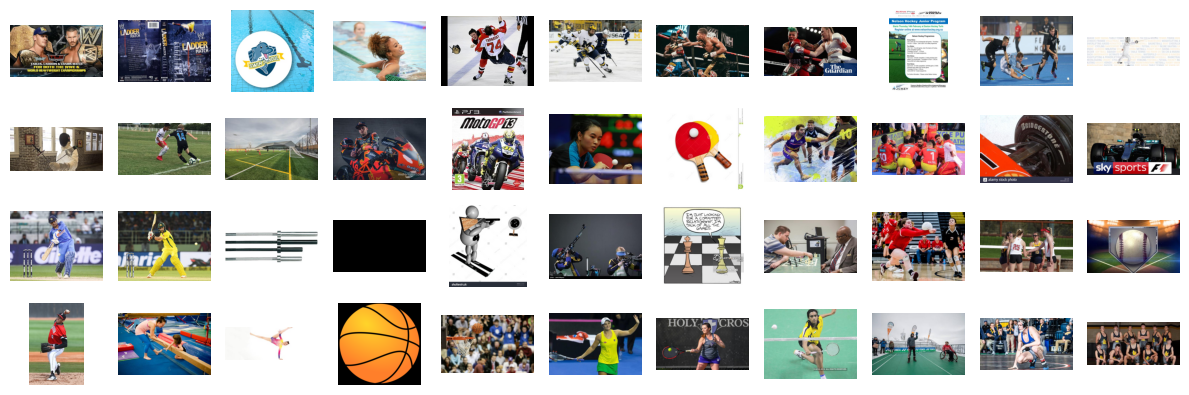

In [10]:
plt.figure(figsize=(12,6))
x = 1
for directory in var_name:
    images = os.listdir(globals()[directory])[:2]  # Get the first two images
    for image_path in images:
        plt.subplot(6,11,x)
        image = mpimg.imread(os.path.join(globals()[directory], image_path))  # Read the image
        plt.imshow(image)  # Display the image
        plt.axis('off')
        x+=1
plt.tight_layout()
plt.show()

In [11]:
base_dir = '/content/Data/input/data'

In [12]:
allowed_extensions = ['.png', '.jpg', '.jpeg', '.gif']

X = []
y = []

for sport_dir in os.listdir(base_dir):
    if not (sport_dir.endswith('.txt') or sport_dir.endswith('.csv') or sport_dir.endswith('.pkl')):
        sport_path = os.path.join(base_dir, sport_dir)
        for file_name in os.listdir(sport_path):
            file_path = os.path.join(sport_path, file_name)
            if os.path.isfile(file_path) and file_path.lower().endswith(tuple(allowed_extensions)):
                try:
                    img = Image.open(file_path)
                    img = img.resize((200, 200))
                    img_data = np.array(img).flatten()
                    if len(img_data) == 200 * 200 * 3:
                        X.append(img_data)
                        y.append(sport_dir)
                    img.close()
                except Exception as e:
                    print(f"Error processing image: {file_path}, {e}")

In [13]:
X = np.array(X)
y = np.array(y)

In [14]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)


In [16]:
clf = RandomForestClassifier()

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy:               precision    recall  f1-score   support

           0       0.45      0.56      0.50       179
           1       0.34      0.46      0.39       168
           2       0.23      0.11      0.15       100
           3       0.29      0.60      0.39       138
           4       0.29      0.12      0.17        99
           5       0.33      0.40      0.36       130
           6       0.35      0.21      0.26       128
           7       0.56      0.69      0.62       167
           8       0.21      0.20      0.20       128
           9       0.23      0.13      0.17       138
          10       0.57      0.28      0.38       117
          11       0.52      0.77      0.62       149
          12       0.57      0.55      0.56        82
          13       0.31      0.48      0.38       122
          14       0.42      0.24      0.31       112
          15       0.61      0.85      0.71       134
          16       0.29      0.16      0.21       135
          17     